13. Roman to Integer
Roman numerals are represented by seven different symbols: I, V, X, L, C, D and M.

Symbol       Value
I             1
V             5
X             10
L             50
C             100
D             500
M             1000
For example, 2 is written as II in Roman numeral, just two ones added together. 12 is written as XII, which is simply X + II. The number 27 is written as XXVII, which is XX + V + II.

Roman numerals are usually written largest to smallest from left to right. However, the numeral for four is not IIII. Instead, the number four is written as IV. Because the one is before the five we subtract it making four. The same principle applies to the number nine, which is written as IX. There are six instances where subtraction is used:

I can be placed before V (5) and X (10) to make 4 and 9. 
X can be placed before L (50) and C (100) to make 40 and 90. 
C can be placed before D (500) and M (1000) to make 400 and 900.
Given a roman numeral, convert it to an integer.

Input: s = "MCMXCIV"
Output: 1994
Explanation: M = 1000, CM = 900, XC = 90 and IV = 4.

按照题目的描述，可以总结如下规则：

罗马数字由 I,V,X,L,C,D,M 构成；
当小值在大值的左边，则减小值，如 IV=5-1=4；
当小值在大值的右边，则加小值，如 VI=5+1=6；
由上可知，右值永远为正，因此最后一位必然为正。
一言蔽之，把一个小值放在大值的左边，就是做减法，否则为加法。

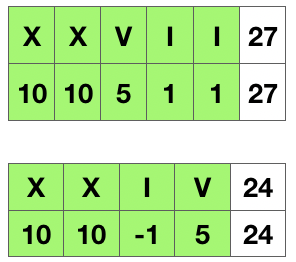

在代码实现上，可以往后看多一位，对比当前位与后一位的大小关系，从而确定当前位是加还是减法。当没有下一位时，做加法即可。

也可保留当前位的值，当遍历到下一位的时，对比保留值与遍历位的大小关系，再确定保留值为加还是减。最后一位做加法即可。


In [ ]:
class Solution:
    def romanToInt(self, s: str) -> int:
        map = {'I':1, 'V':5, 'X':10, 'L':50, 'C':100, 'D':500, 'M':1000}
        output = 0
        for i in range(len(s) - 1):
            if map[s[i]] >= map[s[i+1]]:
                output += map[s[i]]
            else:
                output -= map[s[i]]
        output += map[s[-1]]
        return output

In [ ]:
class Solution:
    def romanToInt(self, s: str) -> int:
        
        sum = 0
        n = len(s)
        for i in range(n-1):
            if s[i] == 'I':
                if s[i + 1] == 'I':
                    sum = sum + 1
                elif s[i + 1] != 'I':
                    sum = sum - 1                    
            elif s[i] == 'V':                
                sum = sum + 5
            elif s[i] == 'X':
                if s[i + 1] == 'L' or s[i + 1] == 'C':
                    sum = sum - 10
                else:
                    sum = sum + 10
            elif s[i] == 'L':
                sum = sum + 50
            elif s[i] == 'C':
                if s[i + 1] == 'D' or s[i + 1] == 'M':
                    sum = sum - 100
                else:
                    sum = sum + 100
            elif s[i] == 'D':
                sum = sum + 500
            elif s[i] == 'M':
                sum = sum + 1000
        
        if s[n-1] == 'I':
            sum = sum + 1
        elif s[n-1] == 'V':
            sum = sum + 5
        elif s[n-1] == 'X':
            sum = sum + 10
        elif s[n-1] == 'L':
            sum = sum + 50
        elif s[n-1] == 'C':
            sum = sum + 100
        elif s[n-1] == 'D':
            sum = sum + 500
        elif s[n-1] == 'M':
            sum = sum + 1000
            
        return sum

In [ ]:
class Solution:
    def romanToInt(self, s: str) -> int:
        translations = {
            "I": 1,
            "V": 5,
            "X": 10,
            "L": 50,
            "C": 100,
            "D": 500,
            "M": 1000
        }
        number = 0
        s = s.replace("IV", "IIII").replace("IX", "VIIII")
        s = s.replace("XL", "XXXX").replace("XC", "LXXXX")
        s = s.replace("CD", "CCCC").replace("CM", "DCCCC")
        for char in s:
            number += translations[char]
        return number